## 세계 테러 데이터 분석 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


from IPython.display import Image, HTML, display
from matplotlib import animation, rc
import io
import base64
from mpl_toolkits.basemap import Basemap


### 데이터 불러오기

In [2]:
terror=pd.read_csv('../data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1', low_memory=False)

terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['Casualties']=terror['Killed']+terror['Wounded']
terror.head(3)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


### 문제 1

> 데이터 전체 기간에서 테러의 숫자를 연도별로 집계하여 연도별 테러 숫자를 시각화 하시오.

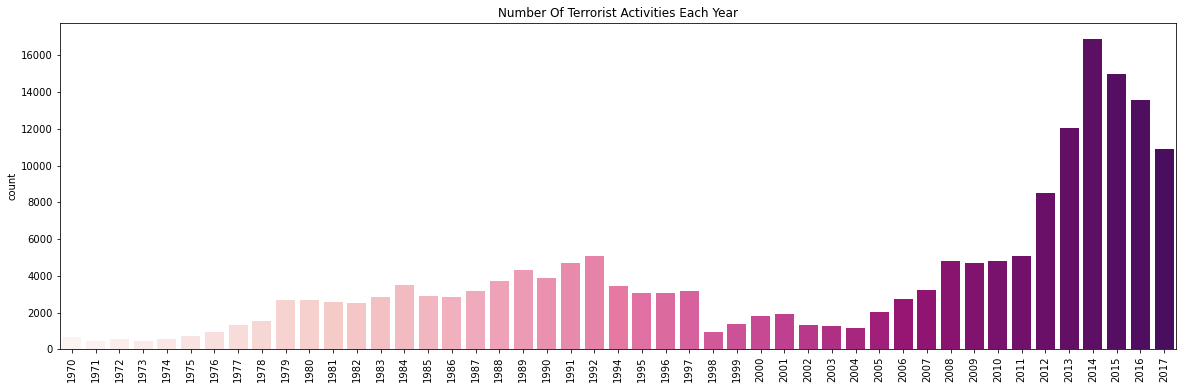

In [4]:
plt.figure(figsize=(20,6))
sns.countplot('Year', data=terror, palette='RdPu')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.xlabel('')
plt.show()

#### 전세계 테러 추이 분석
- 전세계 테러는 1970년대부터 1990년대 초반까지 지속적인 증가추세를보이다가 1990년대 후반에 급감한다. 
- 전세계 테러는 2005년을 기점으로 다시 증가하기 시작하며 2012년~2014년 사이에 급증하는 추세를 보인다. 

##### 세계 이슈 분석 
- 2001년 9/11 테러 이후 서구권 국가에서 연달아 발생한 자생테러와 외로운 늑대 테러는 2000년대 초반 테러 증가 추세에 영향을 미친 것으로 예상한다.
- 2012년 세계 이슈 : 85개국에서 발생한 테러 가운데 55%는 아프가니스탄·파키스탄·이라크에서 발생했다. 당시 다수의 테러가 탈레반에 의해 이루어졌으며 이외에도 국제 테러조직 알카에다와 연계된 많은 테러 조직이 활동했다.
- 2014년 테러단체 ISIS가 등장하면서 테러조직이 ‘국가’를 선포한 최초의 사태가 일어났다. 외국인 테러전투원들을 통해 전세계적 테러확산을 유도하고 소셜미디어와 인터넷 등을 활용하여 테러를 선전하면서 전세계 테러 횟수가 급증하는 데 크게 영향을 미친 것으로 보인다. 

### 문제 2
> 전 세계 테러 데이터를 가지고 테러가 많이 일어난 국가를 정렬해서 상위 10개 국가를 시각화하시오.

In [5]:
terror['Country'].value_counts(ascending=False).index[:10]

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object')

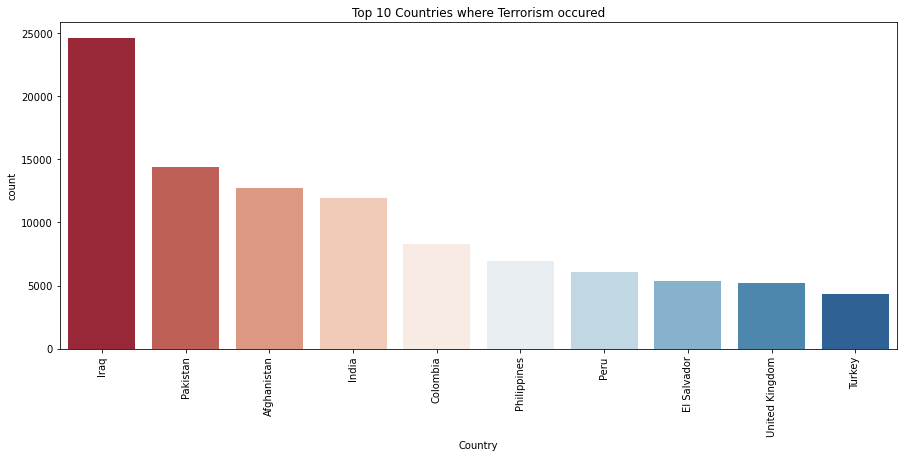

In [6]:
plt.figure(figsize=(15,6))
sns.countplot('Country', data=terror, palette='RdBu', order=terror['Country'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Countries where Terrorism occured')
plt.show();

### 문제 3
> 문제 2의 전 세계 테러가 일어난 횟수별 상위 10위 국가에 대해 국가별로 사망자 수와 부상자 수를 구분하여 시각화하시오.

##### 데이터 다듬기

In [7]:
target_country = terror['Country'].value_counts()[:10].to_frame()
target_country.columns=['Attack']
target_country.head()

,Attack
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306


In [8]:
count_killed = terror.groupby('Country')['Killed'].sum().to_frame()
count_killed.head()

,Killed
Country,
Afghanistan,39384.0
Albania,42.0
Algeria,11066.0
Andorra,0.0
Angola,3043.0


In [9]:
count_wounded = terror.groupby('Country')['Wounded'].sum().to_frame()
count_wounded.head()

,Wounded
Country,
Afghanistan,44277.0
Albania,126.0
Algeria,9150.0
Andorra,0.0
Angola,2455.0


In [10]:
terror2 = pd.concat([target_country, count_killed, count_wounded], axis=1)
terror2

,Attack,Killed,Wounded
Iraq,24636.0,78589.0,134690.0
Pakistan,14368.0,23822.0,42038.0
Afghanistan,12731.0,39384.0,44277.0
India,11960.0,19341.0,28980.0
Colombia,8306.0,14698.0,10328.0
...,...,...,...
Yemen,NaN,8776.0,9328.0
Yugoslavia,NaN,119.0,281.0
Zaire,NaN,324.0,211.0
Zambia,NaN,70.0,62.0


In [11]:
terror2 = terror2[terror2['Attack'].notnull()]
terror2

,Attack,Killed,Wounded
Iraq,24636.0,78589.0,134690.0
Pakistan,14368.0,23822.0,42038.0
Afghanistan,12731.0,39384.0,44277.0
India,11960.0,19341.0,28980.0
Colombia,8306.0,14698.0,10328.0
Philippines,6908.0,9559.0,13367.0
Peru,6096.0,12771.0,4078.0
El Salvador,5320.0,12053.0,5062.0
United Kingdom,5235.0,3410.0,6106.0
Turkey,4292.0,6888.0,9899.0


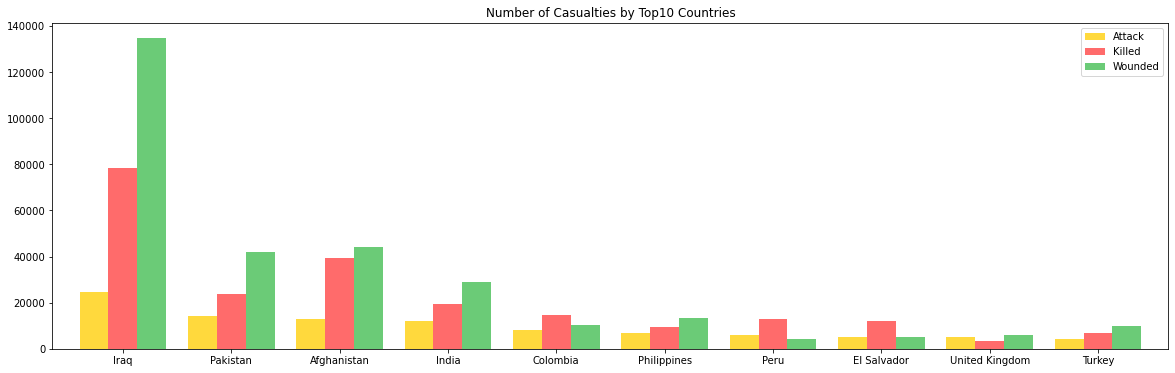

In [14]:
target_country = terror['Country'].value_counts()[:10].to_frame()
target_country.columns=['Attack']
count_wounded = terror.groupby('Country')['Wounded'].sum().to_frame()
count_killed = terror.groupby('Country')['Killed'].sum().to_frame()
terror2 = pd.concat([target_country, count_killed, count_wounded], axis=1)
terror2 = terror2[terror2['Attack'].notnull()].plot.bar(width=0.8, color=['#FFD93D', '#FF6B6B', '#6BCB77'])

fig=plt.gcf()
fig.set_size_inches(20,6)
plt.xticks(rotation=0)
plt.title('Number of Casualties by Top10 Countries')
plt.show()

- 대부분의 국가는 부상자 수가 사망자 수보다 높으나 콜롬비아와 페루, 엘살바도르는 사망자 수가 더 높다. 
- 특히 대부분의 국가는 테러 횟수에 비해 사상자 수가 높으나, 영국의 경우에는 테러 발생 횟수보다 사망자 수가 더 적음을 알 수 있다. 

### 문제 4
> 중동 & 북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 
각 지역별로 테러 공격 형태, 사망자와 사상자의 수 등에 대해 각 지역별로 특성들이 있는지를 확인하시오.

In [15]:
terror['Region'].unique()

array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'],
      dtype=object)

##### 데이터 다듬기

In [16]:
select_region = ['Middle East & North Africa', 'South Asia', 'South America', 'Western Europe', 'Southeast Asia', 'Eastern Europe', 'North America', 'East Asia']
terror_region = terror[terror['Region'].isin(select_region)]
terror.head()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,NaN


##### 지역별 테러 공격 형태

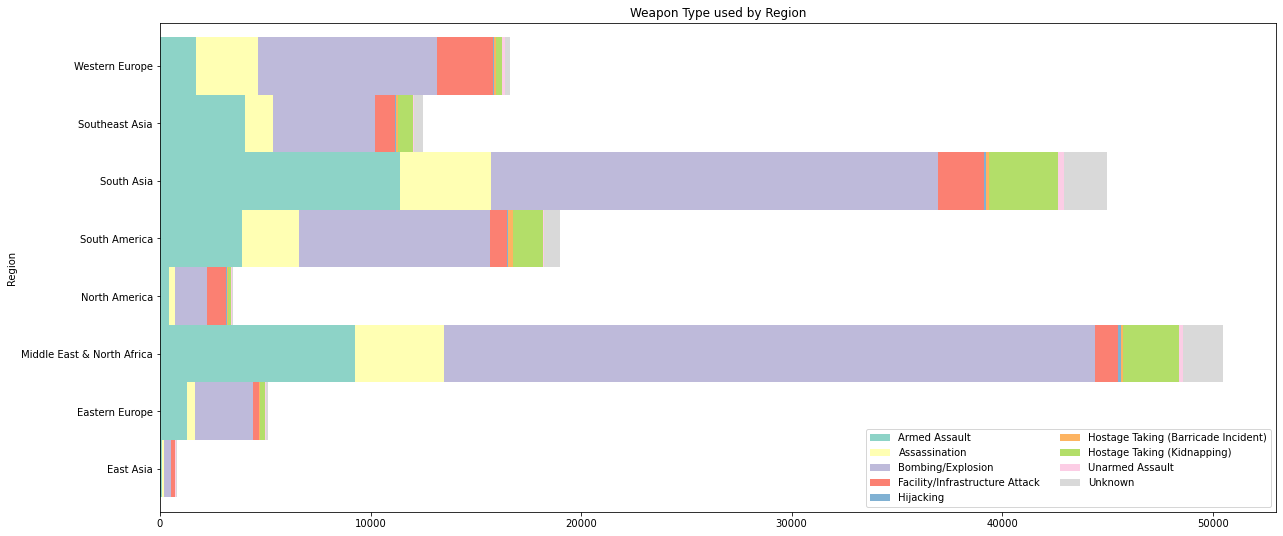

In [47]:
pd.crosstab(terror_region['Region'], terror_region.AttackType).plot.barh(stacked=True, width=1, color=sns.color_palette('Set3', 10))
fig=plt.gcf()
fig.set_size_inches(20,9)
plt.legend(loc='lower right', ncol=2)
plt.title('Weapon Type used by Region')
plt.show()

##### 지역별 테러 공격 형태의 특성 분석

- 대부분 지역의 테러에서 가장 많은 비율을 차지하는 공격 형태는 폭탄이다.
- 폭탄 - 무기 - 암살 - 납치 등의 순으로 공격이 이뤄지는 양상이다. 

##### 지역별 사망자와 사상자 수

##### 데이터 다듬기

In [40]:
terror_casulty = terror_region[['Region','Killed','Wounded','Casualties']]

wounded = terror_casulty.groupby('Region')['Wounded'].sum().to_frame()
killed = terror_casulty.groupby('Region')['Killed'].sum().to_frame()
casualty = terror_casulty.groupby('Region')['Casualties'].sum().to_frame()

In [41]:
terror_casulty = pd.concat([killed, wounded, casualty], axis=1)
terror_casulty.head()

,Killed,Wounded,Casualties
Region,,,
East Asia,1152.0,9213.0,10003.0
Eastern Europe,7415.0,12045.0,18239.0
Middle East & North Africa,137642.0,214308.0,329807.0
North America,4916.0,21531.0,26398.0
South America,28849.0,16704.0,43562.0


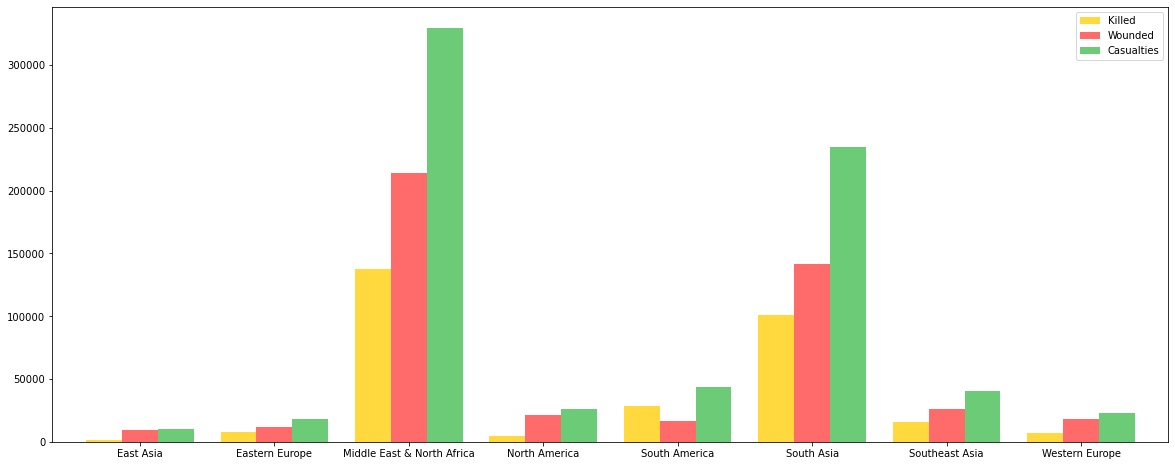

In [44]:
terror_casulty.plot.bar(width=0.8, color=['#FFD93D', '#FF6B6B', '#6BCB77'])

fig=plt.gcf()
fig.set_size_inches(20,8)
plt.xticks(rotation=0)
plt.legend(fontsize=10)
plt.xlabel('')
plt.show()

### 문제 5

> 중동 & 북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여 진행한 문제 4번에 대해 
문제 1번에서 특정 지은 시기를 기준으로 다시 분리하여 테러의 양상을 분석해 보시오.

- 테러가 급증한 2010년대 중점적으로 분석

In [21]:
terror_region_year = terror_region[terror_region['Year'].between(2010, 2017)]

terror_region_year['Year'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

#### 지역별 2010년대 테러 발생 횟수 및 사상자 수 비교 분석 

##### 데이터 다듬기 

In [22]:
terror_region_year.head(1)

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties
94875,2010,1,1,Afghanistan,South Asia,Dwah Mande,33.469444,69.620278,Bombing/Explosion,4.0,0.0,The vehicle,"01/01/2010: On Friday afternoon, in the Dwaman...",Taliban,Private Citizens & Property,Explosives,The specific motive for the attack is unknown.,4.0


In [23]:
terror_region_year2=pd.crosstab(terror_region_year.Year, terror_region_year.Region)
terror_region_year2.head()

Region,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Western Europe
Year,,,,,,,,
2010,1,261,1463,24,148,1981,473,133
2011,4,198,1663,12,106,2138,356,95
2012,4,173,2409,39,133,3803,587,193
2013,15,165,4560,32,182,4612,1188,261
2014,43,962,6939,37,283,4998,1082,215


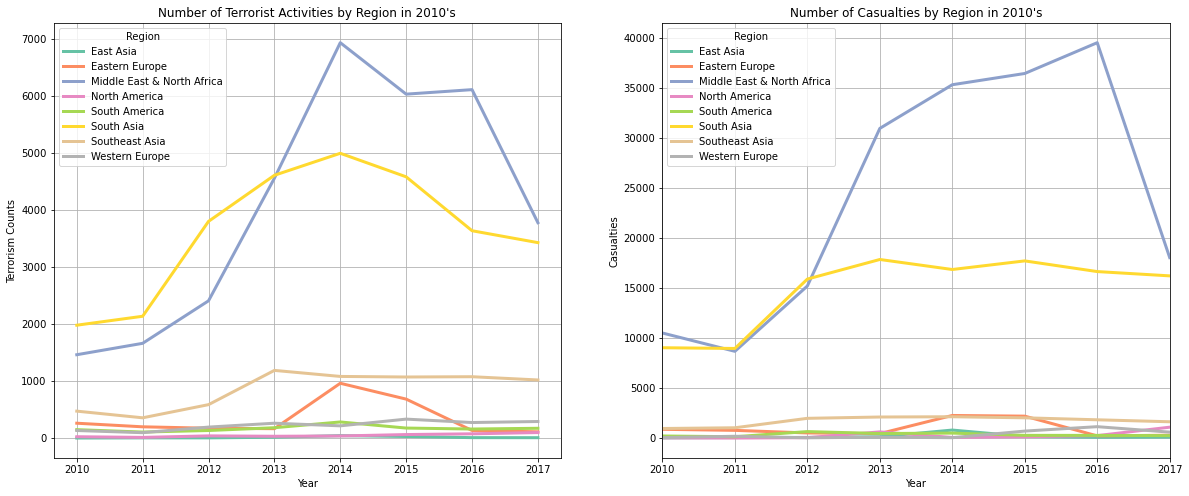

In [24]:
f, ax = plt.subplots(1, 2, figsize=(20, 8)) 

# 지역별 2010년대 테러 발생 횟수 시각화 

terror_region_year2=pd.crosstab(terror_region_year.Year, terror_region_year.Region)

terror_region_year2.plot(ax=ax[0], color=sns.color_palette('Set2',12), linewidth=3, grid=True, 
                        ylabel='Terrorism Counts', title="Number of Terrorist Activities by Region in 2010's")
                        
# 지역별 2010년대 사상자 수 시각화 

d=terror_region_year.groupby(['Year','Region'])['Casualties'].sum()
plot_df = d.unstack('Region').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')

plot_df.plot(ax=ax[1],color=sns.color_palette('Set2',12), linewidth=3)
plt.xlabel("Year")
plt.ylabel("Casualties")
plt.grid()
plt.title("Number of Casualties by Region in 2010's")
plt.show()


#### 분석 결과

- 2010년대에 테러 횟수가 가장 많은 두 지역은 중동&북아프리카 지역과 남아시아 지역이다.  
- 나머지 지역은 연간 테러 횟수가 대체로 1000회 미만으로 낮은 편에 속하나 동남아시아의 연간 테러 횟수는 2013년을 기점으로 1000회를 넘어섰다.
- 서유럽 지역의 경우에 연간 테러 횟수가 500회 미만이었으나 2014년에 약 1000회, 2015년에 700회 정도로 크게 증가한 것을 확인할 수 있다. (ISIS의 테러가 서방 국가들로 확산된 것의 영향 )

- 중동&북아프리카 지역은 테러 횟수 증가에 따라 사상자 수 역시 2010년에는 연간 약 1만명에서 2016년에는 최대 약 4만명까지 증가하는 추세를 보이고 있다. 
- 동아시아는 중동&북아프리카 지역과 달리 테러 횟수의 증감과 상관없이 2012년부터 사상자 수가 약 17000명대 정도이다. 

### 문제 6
> 중동 & 북아프리카, 남아시아, 남아메리카, 서유럽, 남동아시아, 동유럽, 북아메리카, 동아시아 지역으로 구분하여
70년대, 80년대, 90년대, 2000년대 , 2010년대로 구분하여 특성을 분석해 보시오. 

##### 지역별, 연도별 테러 발생 횟수

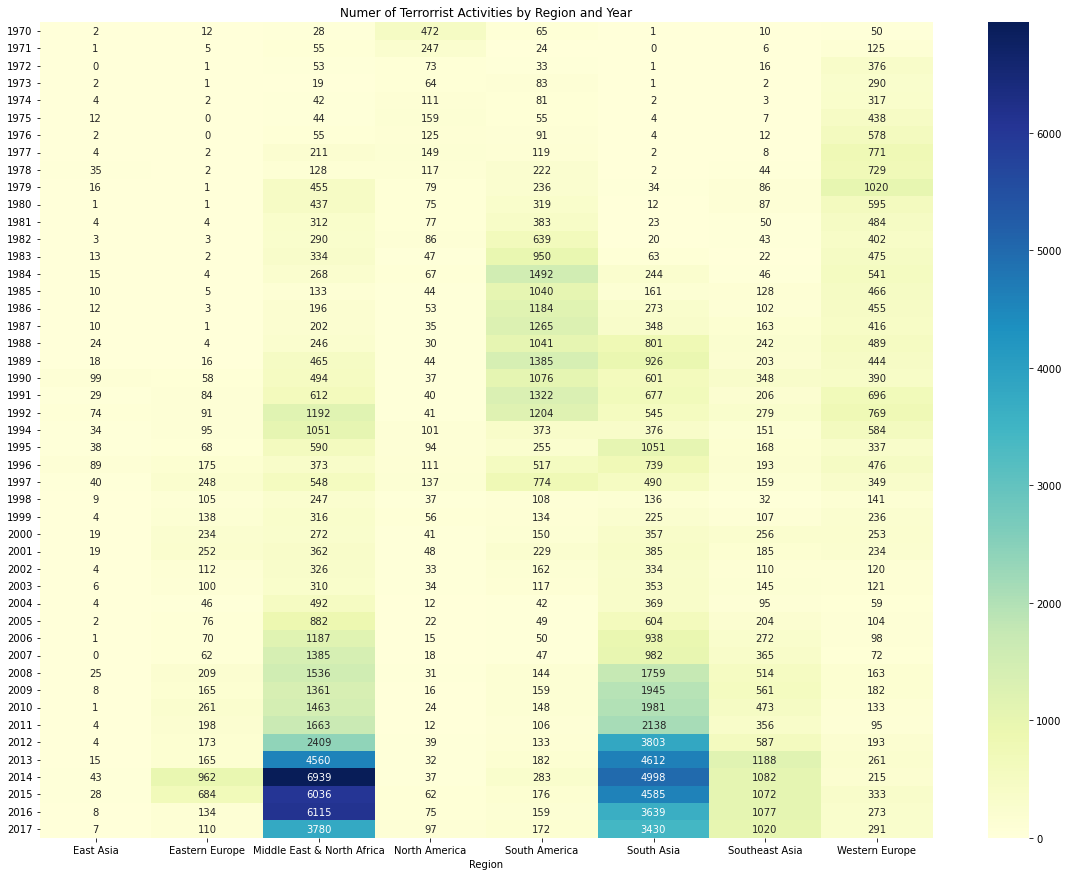

In [25]:
terror_period_full=pd.crosstab(terror_region.Year, terror_region.Region)

plt.figure(figsize=(20, 15))
ax = sns.heatmap(terror_period_full, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Numer of Terrorrist Activities by Region and Year')
plt.ylabel('')
plt.show()


##### 데이터 다듬기

In [26]:
# 1970, 1980, 1990, 2000, 2010년대별로 합산하기 

terror_region['period'] = 0 

def find_tag(value):
    tag = [1979, 1989, 1999, 2009, 2019]
    for i in tag:
        if value <= i:
            return i - 9
            break

terror_region['period'] = [find_tag(e) for e in terror_region.Year]

In [27]:
terror_region.tail()

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties,period
181685,2017,12,31,Afghanistan,South Asia,Maymana,35.921051,64.774544,Bombing/Explosion,0.0,4.0,Jewelry Shop,12/31/2017: An explosive device detonated at a...,Unknown,Business,Explosives,NaN,4.0,2010
181687,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN,9.0,2010
181688,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN,0.0,2010
181689,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN,0.0,2010
181690,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,0.0,0.0,Unknown,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN,0.0,2010


In [28]:
terror_period=pd.crosstab(terror_region.period, terror_region.Region)
terror_period

Region,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Western Europe
period,,,,,,,,
1970,78,26,1090,1596,1009,51,194,4694
1980,110,43,2883,558,9698,2871,1086,4767
1990,416,1062,5423,654,5763,4840,1643,3978
2000,88,1326,8113,270,1149,8026,2707,1406
2010,110,2687,32965,378,1359,29186,6855,1794


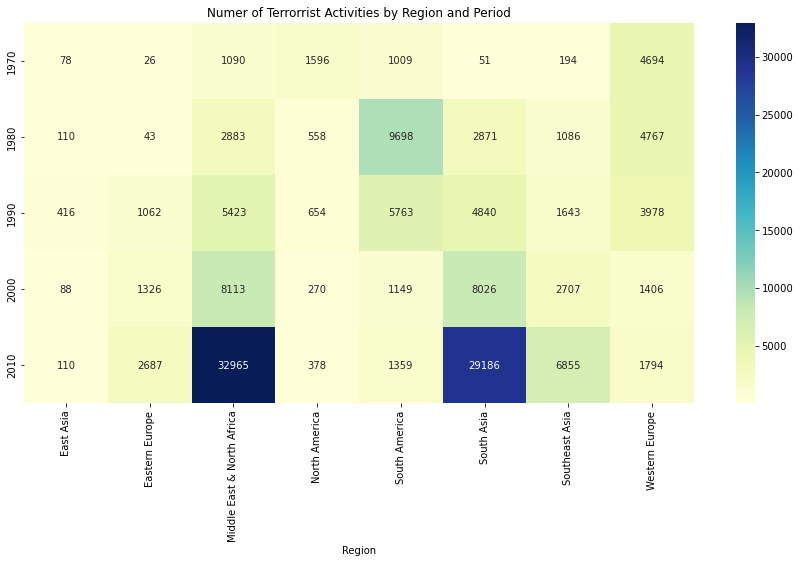

In [29]:
plt.figure(figsize=(15, 7))
ax = sns.heatmap(terror_period, annot=True, fmt="d", cmap='YlGnBu')
plt.title('Numer of Terrorrist Activities by Region and Period')
plt.ylabel('')
plt.show()

# log sclaer 사용해서 색상 표현 해보기 

#### 시기 별 테러 발생 특성 분석

- 70년대에는 서유럽의 테러 발생 횟수가 4694건으로 전 세계에서 가장 테러 발생 빈도가 높다. 
- 80년대에는 남아메리카의 테러 발생 횟수가 9698건으로 전 세계에서 가장 테러 발생 빈도가 높다. 서유럽(4767건)은 70년대와 비슷한 빈도로 테러가 발생 
- 90년대에는 남아메리카(5763건), 중동&북아프리카(5423건), 남아시아(4840건)으로 테러가 자주 발생했다.
- 2000년대에는 중동&북아프리카(8113건)와 남아시아(8026건)에서 8000건이 넘는 테러가 발생했다.
- 2010년대에는 중동&북아프리카(32965건)의 테러 빈도가 2000년대에 비해 약 4배 정도로 급증했다. 남아시아(29186건) 역시 2000년대에 비해서 약 3배 이상 증가했다. 그 외에도 동유럽과 동남아시아에서도 2000년대에 비해 테러 빈도가 2배 정도 증가하는 등, 전세계에서 테러빈도가 증가하였다. 

#### 애니메이션 맵 

MovieWriter imagemagick unavailable; using Pillow instead.



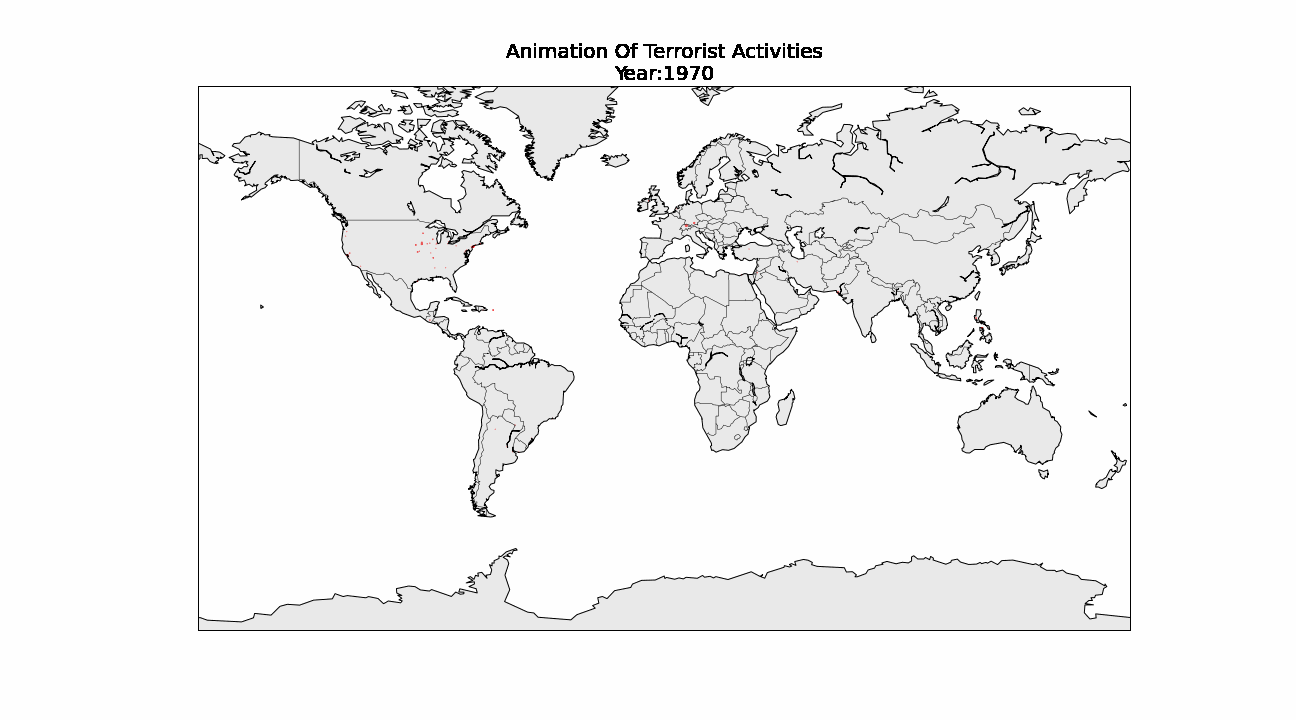

In [30]:

fig = plt.figure(figsize = (18,10))
def animate(Year):
    ax = plt.axes()
    ax.clear()
    ax.set_title('Animation Of Terrorist Activities'+'\n'+'Year:' +str(Year), fontsize=20)
    m6 = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
    lat6=list(terror[terror['Year']==Year].latitude)
    long6=list(terror[terror['Year']==Year].longitude)
    x6,y6=m6(long6,lat6)
    m6.scatter(x6, y6,s=[(kill+wound)*0.1 for kill,wound in zip(terror[terror['Year']==Year].Killed,terror[terror['Year']==Year].Wounded)],color = 'r')
    m6.drawcoastlines()
    m6.drawcountries()
    m6.fillcontinents(zorder = 1,alpha=0.4)
    m6.drawmapboundary()
ani = animation.FuncAnimation(fig,animate,list(terror.Year.unique()), interval = 1500)    
ani.save('animation.gif', writer='imagemagick', fps=1)
plt.close(1)
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))

### 문제 7
> 우리나라의 테러를 집계해서 나름대로의 방법으로 시각화 및 분석을 수행하시오.

##### 데이터 준비

In [31]:
terror3 = terror[terror['Country']=='South Korea']
terror3

,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,Casualties
2514,1974,8,15,South Korea,East Asia,Seoul,37.566535,126.977969,Assassination,1.0,0.0,"wife, Pres. Chung Hu Park",NaN,Korean Youth League,Government (General),Firearms,NaN,1.0
15734,1982,3,18,South Korea,East Asia,Busan,35.179554,129.075642,Facility/Infrastructure Attack,1.0,3.0,US Government Information Office,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,4.0
19820,1983,9,22,South Korea,East Asia,Daegu,35.871435,128.601445,Bombing/Explosion,1.0,4.0,US Cultural Center (housed in a 5 story building),NaN,Unknown,Government (Diplomatic),Explosives,NaN,5.0
29151,1986,9,14,South Korea,East Asia,Gimpo International Airport,37.558947,126.798341,Bombing/Explosion,5.0,19.0,Kimpo International Airport,NaN,Unknown,Airports & Aircraft,Explosives,NaN,24.0
29696,1986,12,15,South Korea,East Asia,Busan,35.179554,129.075642,Armed Assault,0.0,11.0,US Information Svce Bldg,NaN,Student Radicals,Government (General),Melee,NaN,11.0
33678,1988,3,4,South Korea,East Asia,Busan,35.179554,129.075642,Bombing/Explosion,0.0,0.0,Angel Coffee Shop,NaN,Unknown,Business,Explosives,NaN,0.0
33835,1988,3,18,South Korea,East Asia,Seoul,37.566535,126.977969,Facility/Infrastructure Attack,0.0,0.0,U.S. Engineering Unit,NaN,Unknown,Military,Incendiary,NaN,0.0
34532,1988,5,23,South Korea,East Asia,Gwangju,35.159545,126.852601,Facility/Infrastructure Attack,0.0,0.0,U.S. Information Service,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0
34562,1988,5,26,South Korea,East Asia,Seoul,37.566535,126.977969,Facility/Infrastructure Attack,0.0,0.0,Bank,NaN,Unknown,Business,Incendiary,NaN,0.0
34737,1988,6,13,South Korea,East Asia,Daegu,35.871435,128.601445,Facility/Infrastructure Attack,0.0,0.0,U.S. Cultural Center,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0


##### 연도별 테러 발생 건수 

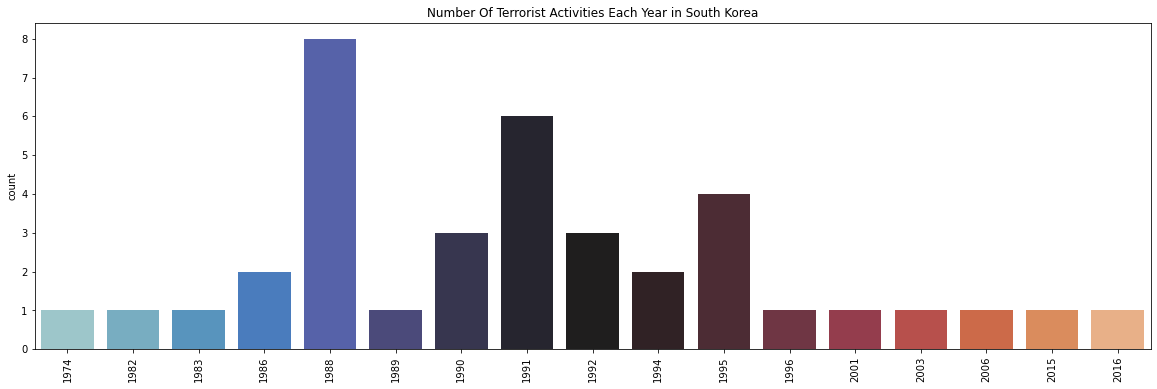

In [32]:
plt.subplots(figsize=(20,6))
sns.countplot('Year', data=terror3, palette='icefire')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year in South Korea')
plt.xlabel('')
plt.show()

##### 우리나라 연도별 테러발생 건수 분석

- 1988년에 8건으로 가장 많은 테러가 발생, 88올림픽과 관련이 있을까?
- 1991년에 6건, 1995년에 4건의 테러 발생 


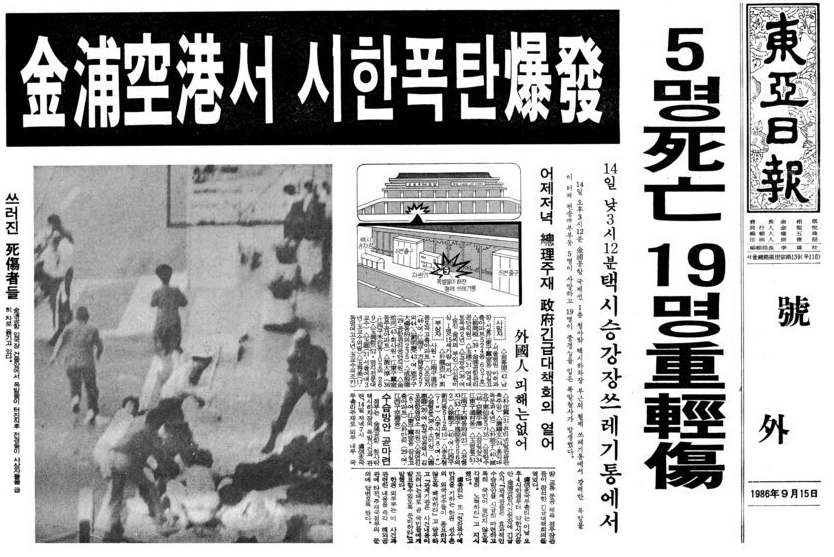

In [33]:
Image("../data/GimpoAirportTerror.png")

##### 도시 별 테러 발생 현황 분석 

In [34]:
terror3['city'].unique()

array(['Seoul', 'Busan', 'Daegu', 'Gimpo International Airport',
       'Gwangju', 'Pyeongtaek', 'Incheon', 'Muan-gun', 'Uijeongbu',
       'Seongnam', 'Buan', 'Gumi'], dtype=object)

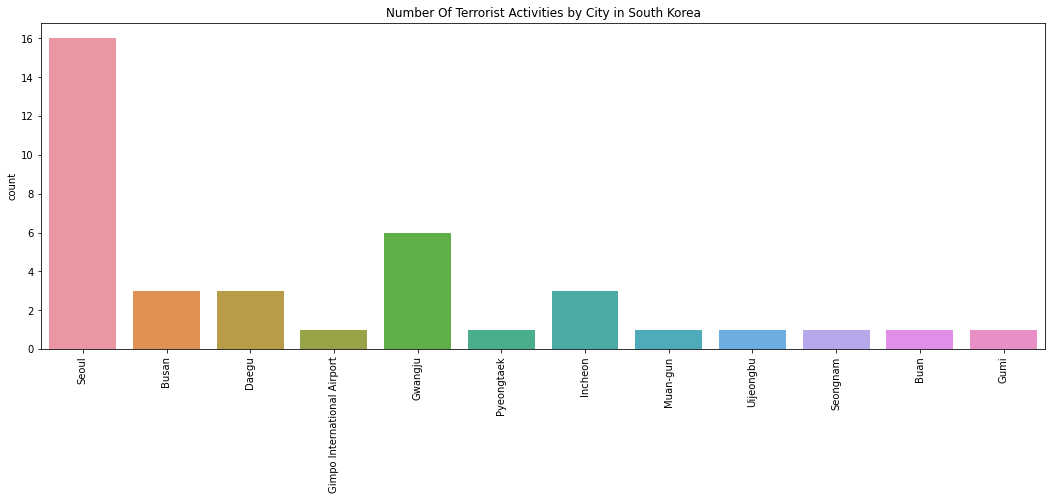

In [35]:
plt.subplots(figsize=(18,6))
sns.countplot('city', data=terror3)
sns.color_palette('Set3', 10)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities by City in South Korea')
plt.xlabel('')
plt.show()

##### 테러 사용 무기 현황

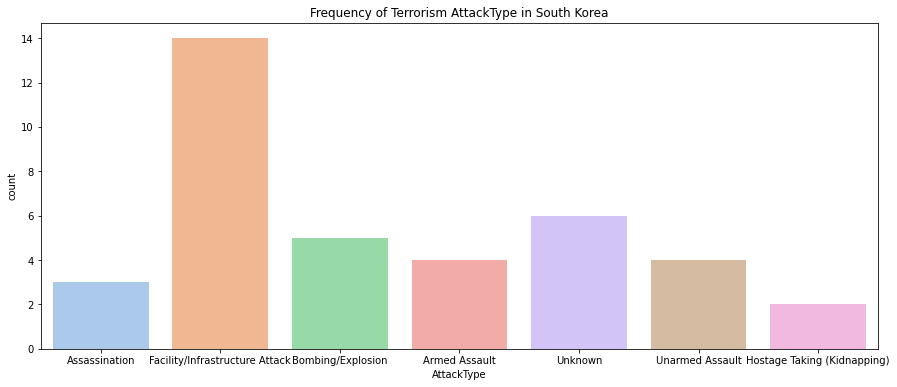

In [36]:
plt.figure(figsize=(15,6))
sns.countplot('AttackType', palette='pastel', data=terror3)
plt.xticks(rotation=0)
plt.title('Frequency of Terrorism AttackType in South Korea')
plt.show();

#### 테러 주체별 분석

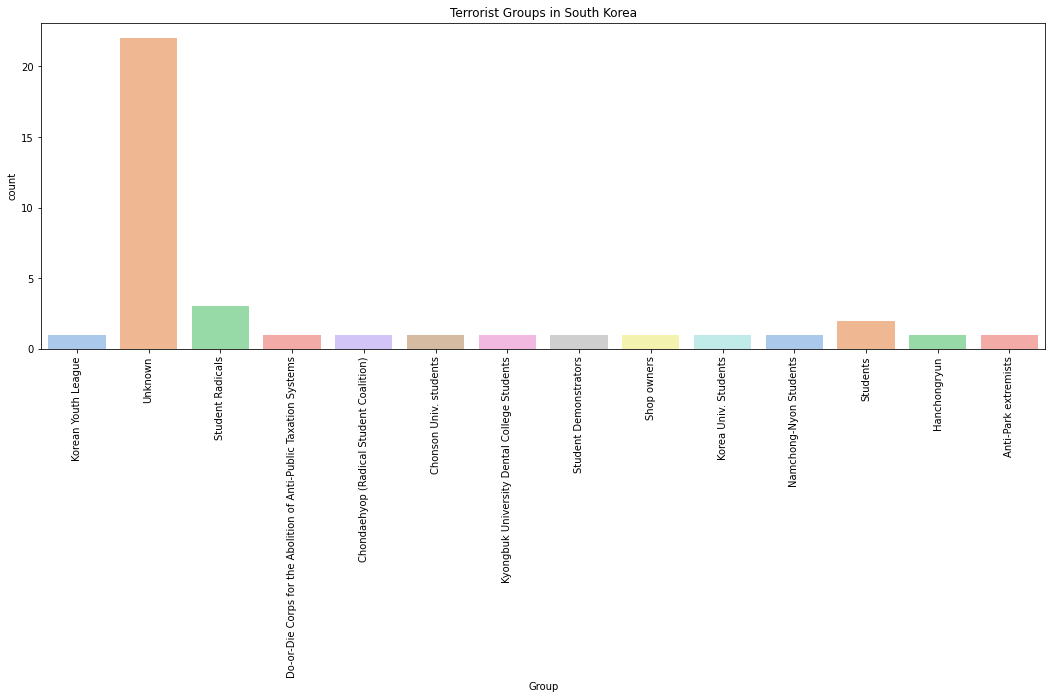

In [37]:
plt.figure(figsize=(18,6))
sns.countplot('Group', palette='pastel', data=terror3)
plt.xticks(rotation=90)
plt.title('Terrorist Groups in South Korea')
plt.show();

### 문제 8
> 테러의 어둡고 무서운 면을 강조할 수 있는 방법을 고민하여 데이터를 분석하고 시각화하여 제시하시오.


#### 테러 단체 분석

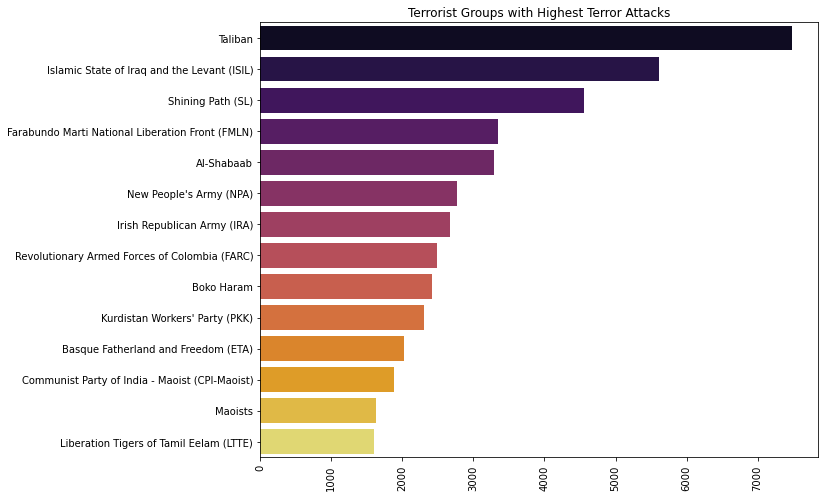

In [38]:
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

#### 연도별 테러 단체 활동 

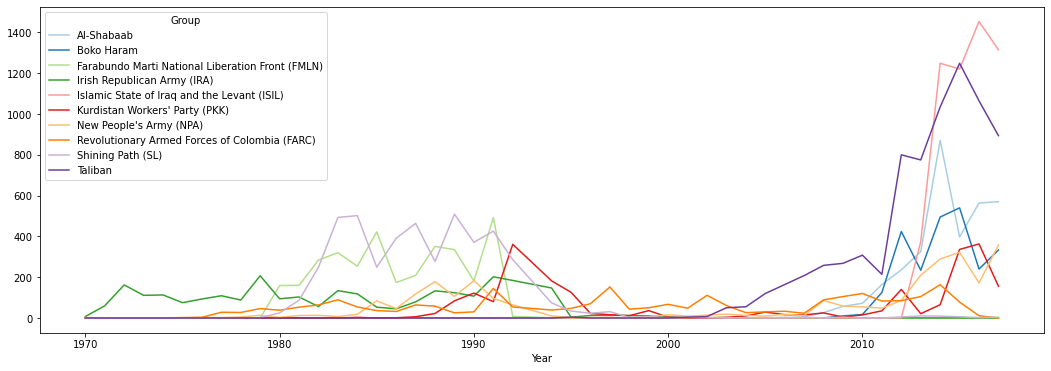

In [39]:
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

#### 끝맺음말

- 전세계 테러 데이터에서 어떤 행위를 테러로 규정하고 담는지에 따라서 데이터 수치나 결과가 크게 달라질 수 있을 것이라는 생각
- 이는 '테러'에 대한 정의가 명확하지 않기 때문에 발생하는 문제
- 데이터에 테러의 의도나 목적에 따른 테러의 종류를 구분지을 수 있는 항목이 존재한다면 테러에 대한 분석이 더 구체화 될 것이고, 나아가 테러를 미리 예방하는데 도움이 될 것임